<a href="https://colab.research.google.com/github/gmsharpe/edumore/blob/master/credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is an attempt to replicate the work by [Alvin Noza](https://medium.com/@alvin.noza) in the article [Credit Card Default Prediction, pt. 1](https://medium.com/@alvin.noza/credit-card-default-prediction-part-i-372e1005f366)

The dataset used for this project is from Kaggle's [Credit Card Payment Default Prediction Hackathon](https://www.kaggle.com/reverie5/av-janata-hack-payment-default-prediction?select=train_20D8GL3.csv)

### A. Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.options.display.max_columns = 100

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
## connect to drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [9]:
%%bash
unzip "/content/gdrive/MyDrive/data/credit_card_default_prediction_kaggle_hackathon.zip"

Archive:  /content/gdrive/MyDrive/data/credit_card_default_prediction_kaggle_hackathon.zip
  inflating: sample_submission_gm6gE0l.csv  
  inflating: test_O6kKpvt.csv        
  inflating: train_20D8GL3.csv       


In [10]:
## load dataset to dataframe
df = pd.read_csv("/content/train_20D8GL3.csv")

print("dataset's shape: ", df.shape)

dataset's shape:  (21000, 25)


### B. Dataset Exploration

In [11]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [12]:
## summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [13]:
## desctriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


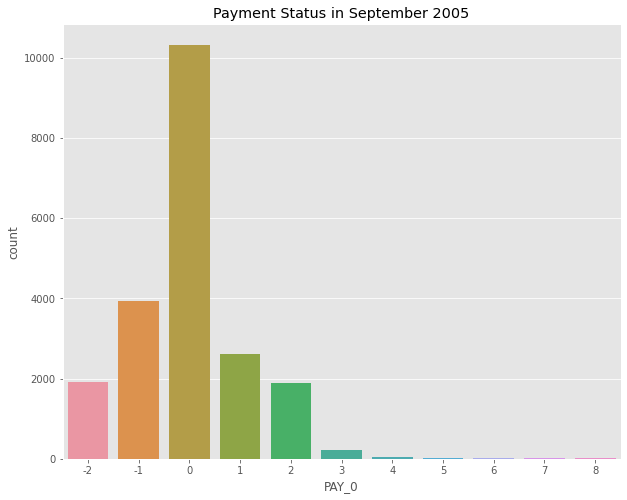

In [14]:
plt.figure(figsize=(10,8))
plt.title("Payment Status in September 2005")
sns.countplot(data=df, x="PAY_0")

plt.show()

### C. Data Cleansing

In [15]:
def missing_val(data):
    df_cols = list(data.columns)
    cols_total_count = len(list(data.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = data[col].isnull().sum()
        total_count = data[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('{} column has {} missing/null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('From {} columns, {} has missing/null values; {}% column has missing/nuls_totalll values'.format(cols_total_count, cols_count, cols_percent_null))

In [16]:
missing_val(df)

From 25 columns, 0 has missing/null values; 0.0% column has missing/nuls_totalll values


#### Duplicated Values Handling

In [17]:
## check duplicated id
id_count = df["ID"].value_counts(ascending=False)
dup_id = id_count[id_count>1].count()

## print result
print("There is {} client's id that appear more than one time in the dataset".format(dup_id))

There is 0 client's id that appear more than one time in the dataset


#### Outliers Values Handling

In [18]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Total outliers value: {}'.format(outlier_count))
    print('Outliers percentage: {}%'.format(outlier_percent))

In [19]:
## take every contious column
cont_cols = list(df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
                           'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

## call the function
for col in cont_cols:
    outlier_count(col)

---------------LIMIT_BAL---------------
Total outliers value: 111
Outliers percentage: 0.53%
---------------BILL_AMT1---------------
Total outliers value: 1663
Outliers percentage: 7.92%
---------------BILL_AMT2---------------
Total outliers value: 1655
Outliers percentage: 7.88%
---------------BILL_AMT3---------------
Total outliers value: 1696
Outliers percentage: 8.08%
---------------BILL_AMT4---------------
Total outliers value: 1789
Outliers percentage: 8.52%
---------------BILL_AMT5---------------
Total outliers value: 1906
Outliers percentage: 9.08%
---------------BILL_AMT6---------------
Total outliers value: 1879
Outliers percentage: 8.95%
---------------PAY_AMT1---------------
Total outliers value: 1905
Outliers percentage: 9.07%
---------------PAY_AMT2---------------
Total outliers value: 1903
Outliers percentage: 9.06%
---------------PAY_AMT3---------------
Total outliers value: 1823
Outliers percentage: 8.68%
---------------PAY_AMT4---------------
Total outliers value: 205

In [20]:
## create a function
def outliers_detection(data):
    plt.figure(figsize=(35, 50))
    i = 0
    for col in cont_cols:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        plt.grid(True)
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col], bins=20)
        plt.title('{} histogram'.format(col))
        plt.grid(True)
    plt.show()

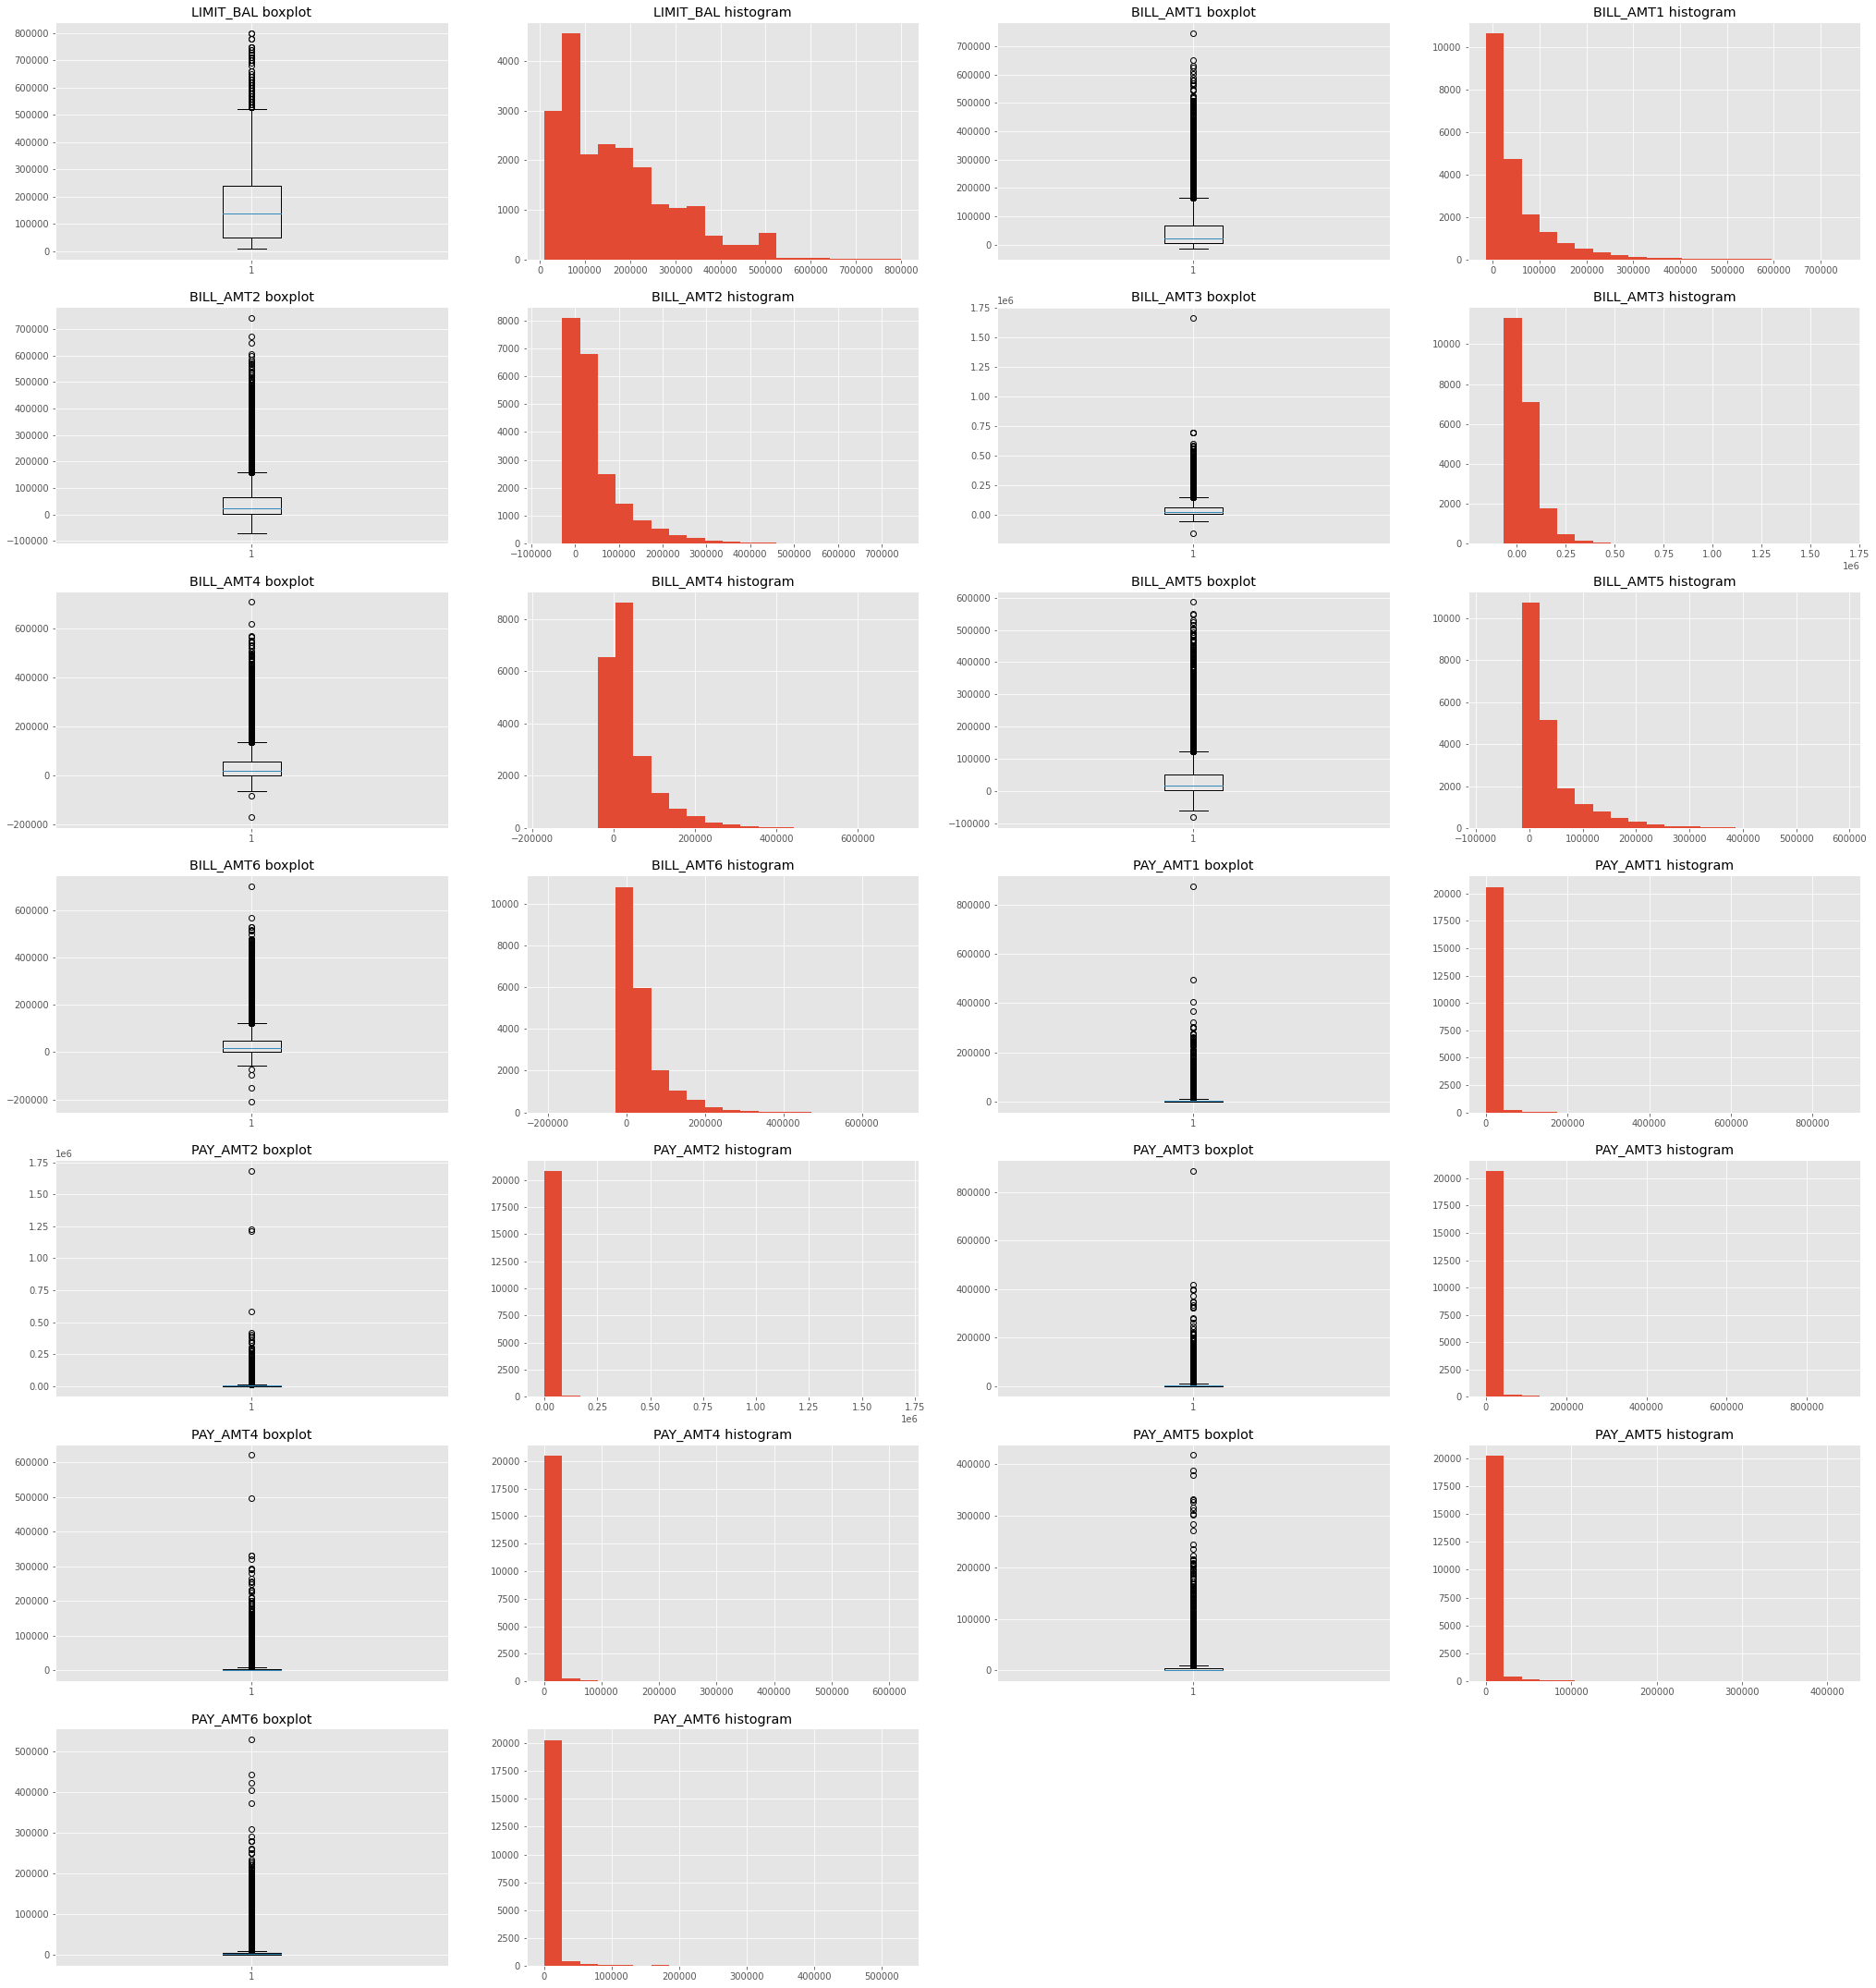

In [21]:
outliers_detection(df)

#### Detect Imbalance Data

In [22]:
## count default freaquent
yes = df.default_payment_next_month.sum()
no = len(df)-yes

# perecentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

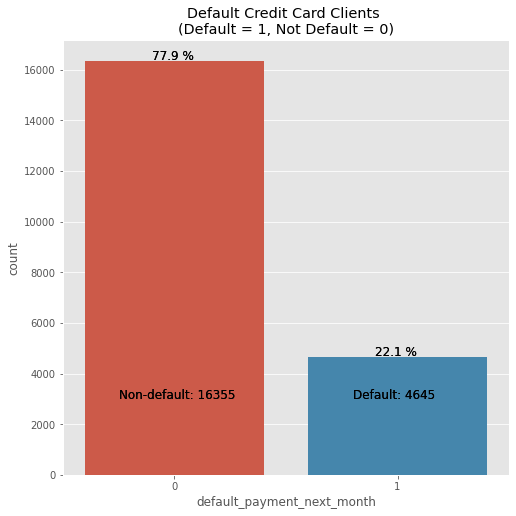

In [23]:
## plot default
plt.figure(figsize = (8,8))
plt.title('Default Credit Card Clients \n(Default = 1, Not Default = 0)')
ax=sns.countplot(x=df['default_payment_next_month'], data=df);
for p in ax.patches:
    ax.annotate('Non-default: {}'.format(no), xy=(1, 15000), xytext=(-0.25, 3000), size=12)
    ax.annotate('Default: {}'.format(yes), xy=(1, 15000), xytext=(0.8, 3000), size=12)
    plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 16400), size=12)
    plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 4700), size=12)
locs, labels = plt.xticks()
plt.show()

### D. Feature Engineering



#### Rename and Drop Columns

In [25]:
## rename column
df.rename(columns={"default_payment_next_month":"DEFAULT",
                  "SEX":"GENDER",
                   "PAY_0":"PAY_1"}, inplace=True)

df.drop(columns="ID", axis=1, inplace=True)

#### Change on Marriage Column

In [ ]:
## check unique value
df['MARRIAGE'].unique()

In [26]:
## assign value 0 to value 3
df["MARRIAGE"] = np.where(df["MARRIAGE"] == 0, 3, df["MARRIAGE"])
## check the unique values again
df["MARRIAGE"].unique()

array([2, 1, 3])

#### Change on Education Column

In [27]:
## check unique values on education column
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [28]:
## assign values
df['EDUCATION'] = np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
## check unique values again
df['EDUCATION'].unique()

array([2, 1, 3, 4])

#### One-Hot Encoding

In [29]:
df_ohe = df.copy()

In [30]:
## set target
target_col = df_ohe["DEFAULT"]
## set features
features_col = df_ohe[['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]]

In [31]:
## set categorical columns
categorical_cols = ['GENDER','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
## set numerical columns
numerical_cols = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [32]:
## one-hot encoding
for col in categorical_cols:
    dum_df = pd.get_dummies(df_ohe[col], prefix=col)
    df_ohe = df_ohe.join(dum_df)

In [33]:
df_ohe.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GENDER_1,GENDER_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [34]:
## set target
target_var = "DEFAULT"
## create a list
col_names = list(df_ohe.columns)
## move target to the first index of the list
col_names.insert(0, col_names.pop(col_names.index(target_var)))
## apply it to the dataframe
df_ohe = df_ohe.loc[:, col_names]

In [35]:
## show the first five rows of the df_ohe
df_ohe.head()

,DEFAULT,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GENDER_1,GENDER_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [36]:
print("df's shape: ", df.shape)
print("df_ohe's shape: ", df_ohe.shape)

df's shape:  (21000, 24)
df_ohe's shape:  (21000, 96)


### E. Export to CSV

In [37]:
## reconnect to drive
#connect notebook ke google drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
## export df
df.to_csv("/content/gdrive/MyDrive/data/preprocessed_data.csv", index=False)

## export df_ohe
df_ohe.to_csv("/content/gdrive/MyDrive/data/preprocessed_data_ohe.csv", index=False)

In [44]:
## load csv files
df1 = pd.read_csv("/content/gdrive/MyDrive/data/preprocessed_data.csv")
df2 = pd.read_csv("/content/gdrive/MyDrive/data/preprocessed_data_ohe.csv")
print("df1's shape: ", df1.shape)
print("df2's shape: ", df2.shape)

df1's shape:  (21000, 24)
df2's shape:  (21000, 96)


In [45]:
df2.head()

,DEFAULT,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,GENDER_1,GENDER_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
df1.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0
